# Task I: Quantum Computing Part

1) implement a simple quantum operation with Cirq

a) With 5 qubits

b) Apply Hadamard operation on every qubit

c) Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)

d) SWAP (0, 4)

e) Rotate X with pi/2 on any qubit

f) Plot the circuit

2) Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩ state. 

In [2]:
import cirq
import numpy as np
from cirq import Simulator
from cirq.contrib.svg import SVGCircuit

## Implement a simple quantum operation with Cirq

In [3]:
n = 5  # Number of qubits

# create a circuit with n qubits
qr = cirq.LineQubit.range(n)
circuit = cirq.Circuit()

# Appl hadamard gate on each qubit
circuit.append(cirq.H.on_each(*qr))

# Apply cnot gates on (0, 1), (1,2), (2,3), (3,4)
for i in range(4):
    circuit.append(cirq.CNOT(qr[i], qr[i+1]))

# Apply swap on (0,4)
circuit.append(cirq.SWAP(qr[0], qr[4]))

# Randomly chose a qubit for applying Rotation X gate
index = np.random.randint(n)

# Apply Rx gate on that qubit
circuit.append(cirq.rx(rads=np.pi/2).on(qr[index]))

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


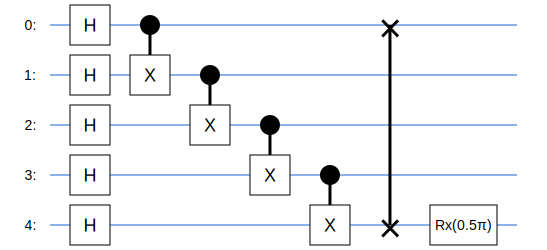

In [4]:
SVGCircuit(circuit)

## Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩ state.

In [5]:
# Initialize quantum circuit
qr = cirq.LineQubit.range(1)
circuit = cirq.Circuit()

total_angle = 0  # Stores total angle of rotation

# Appling Rx gates
for i in range(n):
    # Uniformly randoml generate small angles
    angle = (np.pi/2)*np.random.uniform(0, 1)
    total_angle += angle                             # Update total angle
    circuit.append(cirq.rx(rads=angle).on(qr[0]))  # Apply Rx gate

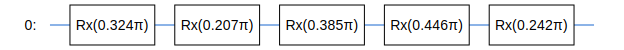

In [6]:
SVGCircuit(circuit)

In [7]:
print("Total angle of rotation in radians:", total_angle/np.pi)

Total angle of rotation in radians: 1.6027927935525073


In [8]:
sim = Simulator()
repetitions = 10
circuit.append(cirq.measure(qr[0]))
results = sim.run(program=circuit, repetitions=repetitions)

Text(0, 0.5, 'Probabilities')

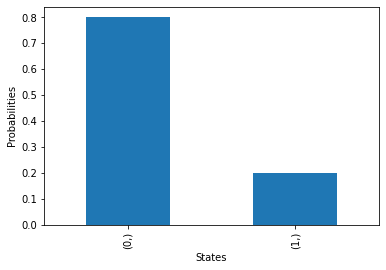

In [9]:
ax = (results.data.value_counts()/repetitions).plot(kind='bar')
ax.set_xlabel("States")
ax.set_ylabel("Probabilities")

In [10]:
print("probability of measuring the state in the |0⟩ state:",
      (results.data.value_counts()/repetitions)[0])

probability of measuring the state in the |0⟩ state: 0.8
